In [1]:
from PIL import Image

In [2]:
im = Image.open('c_nut2.jpg')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

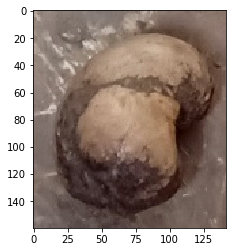

In [4]:
plt.imshow(im)

In [5]:
import numpy as np

In [6]:
data = np.array(im)

In [7]:
data.shape

(160, 142, 3)

In [8]:
r,g,b = data[:,:,0],data[:,:,1],data[:,:,2]

In [9]:
new_im = (r+g+b)/3
new_im2 = gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

In [10]:
data2 = np.array(new_im2)

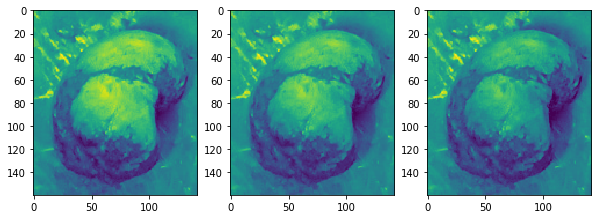

In [11]:
fig, axes = plt.subplots(1, 3,  figsize=(10,4))
      
axes[0].imshow(r)

axes[1].imshow(g)

axes[2].imshow(b)


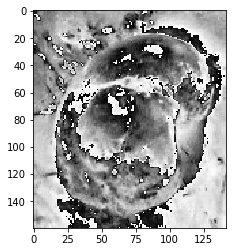

In [12]:
plt.imshow(new_im,'Greys')

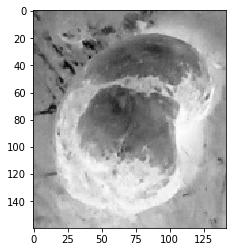

In [13]:
plt.imshow(new_im2,'Greys')

In [14]:
new_im2.shape

(160, 142)

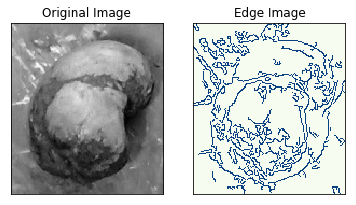

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c_nut2.jpg',0)
edges = cv2.Canny(img,50,150,apertureSize = 3)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'GnBu')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
import keras

C:\Users\Avishkar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D

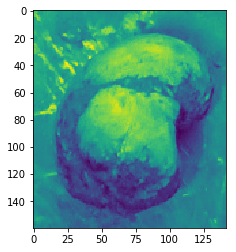

In [18]:
plt.imshow(r)

In [19]:
import tensorflow as tf

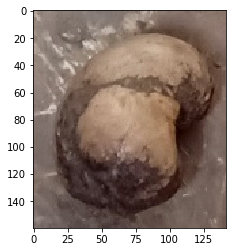

In [20]:
plt.imshow(data)

In [21]:
data.shape

(160, 142, 3)

In [22]:
r_ten = tf.constant(data,dtype=tf.float32)
r_ten = tf.reshape(r_ten,(1,160,142,3))
y_ten = ZeroPadding2D((3,3))(r_ten)
z_ten = Conv2D(1, (2,2), strides = (2, 2))(y_ten)
a_ten = BatchNormalization(axis = 3)(z_ten)
b_ten = Activation('relu')(a_ten)
c_ten = AveragePooling2D((2,2),strides=(1,1), name='max_pool')(b_ten)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    y = sess.run(y_ten)
    z = sess.run(z_ten)
    a = sess.run(a_ten)
    b = sess.run(b_ten)
    c = sess.run(c_ten)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
y.shape


(1, 166, 148, 3)

In [24]:
z.shape

(1, 83, 74, 1)

In [25]:
a.shape

(1, 83, 74, 1)

In [26]:
b.shape

(1, 83, 74, 1)

In [27]:
c.shape

(1, 82, 73, 1)

In [28]:
yy = y.reshape(166,148,3)
zz = z.reshape(83,74)
aa = a.reshape(83,74)
bb = b.reshape(83,74)
cc = c.reshape(82,73)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'cc')

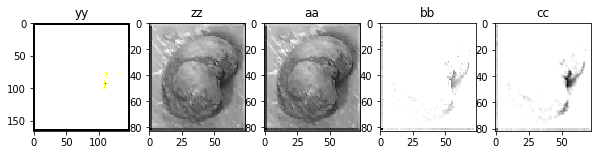

In [29]:
fig, axes = plt.subplots(1, 5,  figsize=(10,4))
      
axes[0].imshow(yy)
axes[0].set_title('yy')

axes[1].imshow(zz,'Greys')
axes[1].set_title('zz')

axes[2].imshow(aa, 'Greys')
axes[2].set_title('aa')

axes[3].imshow(bb, 'Greys')
axes[3].set_title('bb')

axes[4].imshow(cc, 'Greys')
axes[4].set_title('cc')

In [119]:
edge = bb

In [120]:
for i in range (0,edge.shape[0]):
    for j in range(0,edge.shape[1]):
        if aa[i][j] >80:
            edge[i][j] = 1
        else:
            edge[i][j] = 0
            

In [121]:
edge.shape

(83, 74)

In [122]:
edge.max()

1.0

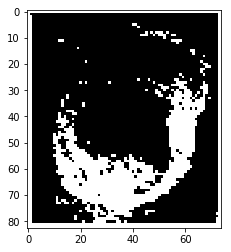

In [123]:
plt.imshow(edge,'Greys')

In [30]:
data.shape

(160, 142, 3)

In [392]:
my_image = cv2.imread('c_nut2.jpg',cv2.IMREAD_GRAYSCALE)
my_image = cv2.resize(my_image,(142,142))

In [393]:
ed = cv2.Canny(my_image,100,200)

In [394]:
my_fil = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [395]:
#my_fil = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [396]:
my_fil.shape

(3, 3)

In [397]:
values = []
for x in range (142-3):
    for y in range(142-3):
        value = (my_image[x][y]*my_fil[0][0]+my_image[x][y+1]*my_fil[0][1]+my_image[x][y+2]*my_fil[0][2]+
        my_image[x+1][y]*my_fil[1][0]+my_image[x+1][y+1]*my_fil[1][1]+my_image[x+1][y+2]*my_fil[1][2]+
        my_image[x+2][y]*my_fil[2][0]+my_image[x+2][y+1]*my_fil[2][1]+my_image[x+2][y+2]*my_fil[2][2])
        values = np.append(values,value)       
 

In [398]:
pic = values.reshape(139,139)

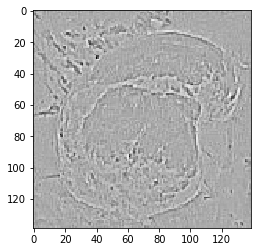

In [399]:
plt.imshow(pic,'Greys')

In [400]:
edge = pic

In [401]:
pic.max()

382.0

In [402]:
for i in range (0,edge.shape[0]):
    for j in range(0,edge.shape[1]):
        if 300>pic[i][j] >30:
            edge[i][j] = 1
        else:
            edge[i][j] = 0
            

Text(0.5,1,'cvedge')

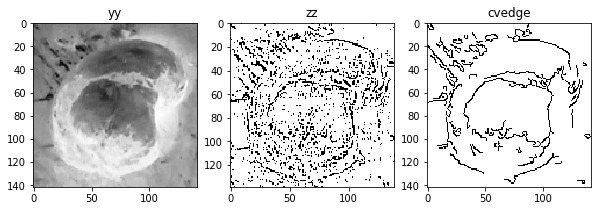

In [403]:
fig, axes = plt.subplots(1, 3,  figsize=(10,4))
      
axes[0].imshow(my_image,'Greys')
axes[0].set_title('yy')

axes[1].imshow(edge,'Greys')
axes[1].set_title('zz')

axes[2].imshow(ed,'Greys')
axes[2].set_title('cvedge')